In [72]:
import pandas
from pandas_datareader import data
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import scipy.stats as stats

In [99]:
#Getting the financial data

In [2]:
VBLTX_prices = data.DataReader('vbltx',  'yahoo', datetime.date(1998, 1, 1), datetime.date(2009,12,31))["Adj Close"]
FMAGX_prices = data.DataReader('fmagx',  'yahoo', datetime.date(1998, 1, 1), datetime.date(2009,12,31))["Adj Close"]
SBUX_prices = data.DataReader('sbux',  'yahoo', datetime.date(1998, 1, 1), datetime.date(2009,12,31))["Adj Close"]

In [3]:
VBLTX_prices = VBLTX_prices.resample('1M').last()
FMAGX_prices = FMAGX_prices.resample('1M').last()
SBUX_prices = SBUX_prices.resample('1M').last()

In [4]:
VBLTX_prices.index = list(map(lambda dt: datetime.date(dt.year, dt.month, 1), VBLTX_prices.index))
FMAGX_prices.index = list(map(lambda dt: datetime.date(dt.year, dt.month, 1), FMAGX_prices.index))
SBUX_prices.index = list(map(lambda dt: datetime.date(dt.year, dt.month, 1), SBUX_prices.index))

In [5]:
print(SBUX_prices[0:10])
print(SBUX_prices[-10:-1])

1998-01-01    2.060459
1998-02-01    2.229522
1998-03-01    2.553560
1998-04-01    2.712057
1998-05-01    2.705012
1998-06-01    3.011439
1998-07-01    2.359841
1998-08-01    1.778686
1998-09-01    2.039326
1998-10-01    2.444373
Name: Adj Close, dtype: float64
2009-03-01    5.008781
2009-04-01    6.519080
2009-05-01    6.487521
2009-06-01    6.262104
2009-07-01    7.979787
2009-08-01    8.561364
2009-09-01    9.309750
2009-10-01    8.556855
2009-11-01    9.873295
Name: Adj Close, dtype: float64


In [98]:
#Calculating the returns

In [6]:
all_prices = pandas.concat([VBLTX_prices, FMAGX_prices, SBUX_prices], join='outer', axis=1)

In [7]:
all_prices.columns = ["VBLTX", "FMAGX", "SBUX"]

In [8]:
all_return = np.log(all_prices).diff()[1:]

In [9]:
print(all_return[0:10])
print(all_return[-10:-1])
print(all_return.columns)

               VBLTX     FMAGX      SBUX
1998-02-01 -0.005392  0.073069  0.078858
1998-03-01  0.002468  0.049066  0.135701
1998-04-01  0.005197  0.011513  0.060219
1998-05-01  0.018197 -0.019775 -0.002601
1998-06-01  0.020489  0.041723  0.107312
1998-07-01 -0.005685 -0.007508 -0.243824
1998-08-01  0.035717 -0.168250 -0.282719
1998-09-01  0.029343  0.058704  0.136744
1998-10-01 -0.020465  0.074189  0.181169
1998-11-01  0.017132  0.074733  0.061472
               VBLTX     FMAGX      SBUX
2009-03-01  0.018430  0.130240  0.194092
2009-04-01 -0.012671  0.128111  0.263541
2009-05-01  0.013072  0.060487 -0.004853
2009-06-01  0.027829 -0.013850 -0.035364
2009-07-01  0.036062  0.084007  0.242395
2009-08-01  0.020571  0.021429  0.070348
2009-09-01  0.025939  0.051726  0.083803
2009-10-01 -0.009017 -0.055805 -0.084330
2009-11-01  0.015034  0.053063  0.143101
Index(['VBLTX', 'FMAGX', 'SBUX'], dtype='object')


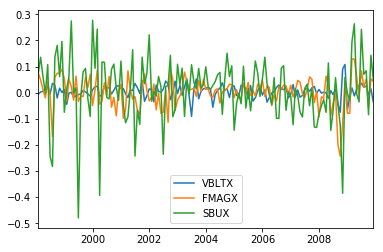

In [10]:
%matplotlib inline
plt.figure(); all_return.plot();

In [11]:
def overlapped_bar(df, show=False, width=0.9, alpha=.5,
                   title='', xlabel='', ylabel='', **plot_kwargs):
    """Like a stacked bar chart except bars on top of each other with transparency"""
    xlabel = xlabel or df.index.name
    N = len(df)
    M = len(df.columns)
    indices = np.arange(N)
    colors = ['red', 'black', 'green'] * int(M / 3. + 1)
    for i, label, color in zip(range(M), df.columns, colors):
        kwargs = plot_kwargs
        kwargs.update({'color': color, 'label': label})
        plt.bar(indices, df[label], width=width, alpha=alpha if i else 1, **kwargs)
        plt.xticks(indices + .5 * width,
                   ['{}'.format(idx) for idx in df.index.values])
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    if show:
        plt.show()
    return plt.gcf()

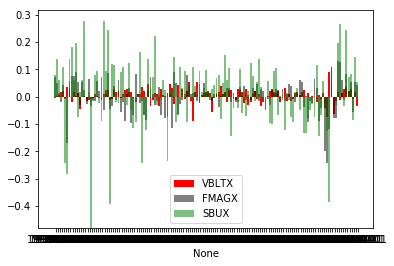

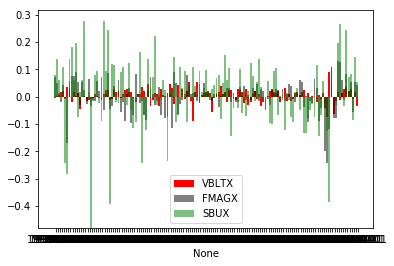

In [12]:
overlapped_bar(all_return, False)

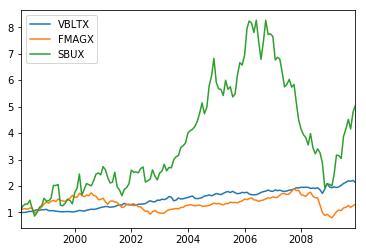

In [45]:
simple_returns = (all_prices.diff() / all_prices.shift(1))+1
simple_returns = simple_returns[1:].cumprod()
plt.figure(); simple_returns.plot();

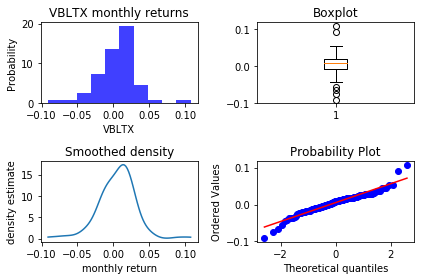

In [80]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# the histogram of the data

n, bins, patches = ax1.hist(all_return["VBLTX"], 10, normed=1, facecolor='blue', alpha=0.75, )

ax1.set_xlabel('VBLTX')
ax1.set_ylabel('Probability')
ax1.set_title('VBLTX monthly returns')

ax2.boxplot(all_return["VBLTX"])
ax2.set_title('Boxplot')

kde = gaussian_kde(all_return["VBLTX"])
dist_space = linspace( min(all_return["VBLTX"]), max(all_return["VBLTX"]), 100 )
ax3.set_title('Smoothed density')
ax3.set_xlabel('monthly return')
ax3.set_ylabel('density estimate')
ax3.plot( dist_space, kde(dist_space) )

stats.probplot(all_return["VBLTX"], dist="norm", plot=ax4)

plt.tight_layout()
plt.show()

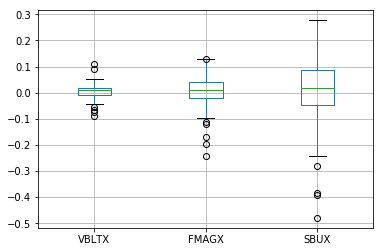

In [86]:
bp = all_return.boxplot(column=["VBLTX", "FMAGX", "SBUX"])

In [87]:
all_return.mean()

VBLTX    0.005294
FMAGX    0.001888
SBUX     0.011318
dtype: float64

In [89]:
all_return.var()

VBLTX    0.000679
FMAGX    0.003206
SBUX     0.014254
dtype: float64

In [91]:
all_return.std()

VBLTX    0.026061
FMAGX    0.056620
SBUX     0.119392
dtype: float64

In [92]:
all_return.skew()

VBLTX   -0.152284
FMAGX   -1.054693
SBUX    -0.915704
dtype: float64

In [94]:
all_return.kurt()

VBLTX    3.111948
FMAGX    2.844665
SBUX     2.834559
dtype: float64

In [97]:
all_return.corr()

,VBLTX,FMAGX,SBUX
VBLTX,1.000000,0.052924,-0.056572
FMAGX,0.052924,1.000000,0.448549
SBUX,-0.056572,0.448549,1.000000
